# Analysis of Scotch Whisky Production and Flavor Profiles
---

Scotch Whisky is renowned for its intricate flavors and diverse sensory experiences. This uniqueness is further emphasized by the various regions of Scotland in which these spirits are crafted, each region contributing its distinct flavor profiles.

The aim of this case study is to classify Scotch whiskies based on their intricate flavor characterisitcs. The central focus lies in the meticulous categorization of these iconic beverages to gain insights into their distinctive taste attributes.

The dataset consists of taste ratings of a single malt Scotch whisky derived from nearly every active whisky distillery in Scotland. It is a repository of evaluations for 86 malt whiskies, each being appraised on a scale from 0 to 4 across 12 different taste categories. These taste categories provide comprehensive insights into the character of the whiskies, encompassing aspects such as sweetness, smokiness, medicinal attributes, spiciness and more.

## Task Description
---

**Task 1 - Finding Correlations**
- Description:
    * Finding correlations among 86 Scotch Whiskies, aiming to determine patterns and connections between different flavor characteristics

**Task 2 - Clustering**
- Description:
    * Finding correlation matrix using `Pearson Correlation` among different flavor attributes
    * Employing `Spectral Coclustering` to find approximate solution to clustering
    * Identifying six distinct cluster blocks

**Task 3 - Bokeh Plot**
- Description:
    * Using Bokeh to create an interactive plot of geographical map of distilleries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Loading Whisky Data
---

The first task involves loading and examining the data. This requires the utilization of two data files: `whiskies.txt` and `regions.txt`.

The `regions.txt` file contains the regions from which each whisky originates. The `whiskies.txt` file contains all details about the whiskies.

- Extracting whisky-related information from `whiskies.txt` and storing it in a dataframe

- Reading in the `regions.txt` file and adding it as a column to the whisky dataframe

In [43]:
relative_path = "./"

In [44]:
whisky_file = os.path.join(relative_path,'whiskies.txt')
region_file = os.path.join(relative_path, 'regions.txt')

In [45]:
whisky_df = pd.read_csv(whisky_file)

In [46]:
whisky_df["Region"] = pd.read_csv(region_file)

In [47]:
whisky_df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


The `iloc` method can be used to index a dataframe based on integer positions. The method provides a means to access specific rows and columns within the dataset, utilizing integer-based referencing.

Indexing is defined by two parameters: the `start_index` and the `end_index`.

The `start_index` denotes the initial position from which the indexing operation commences, inclusively, and the end index signifies the position where the operation concludes, exclusively.

Taking a look at the first 10 rows of the whisky dataframe.

In [48]:
whisky_df.iloc[0:10]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands


The `iloc` method can also be applied in examining the columns within a dataframe.

In the dataset, a subset of the columns contain the data for flavor attributes of whisky. Utilizing the `.columns` attribute on a dataframe object yields the column names associated with that particular dataframe.

In [49]:
whisky_df.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')

Starting from index 2 for the first flavor attribute `Body` and including index 14 for `Floral` gives the column index locations for the flavors.

Next, the flavor attributes for the first ten whiskies in the dataframe are examined.

In [50]:
whisky_df.iloc[0:11,2:14]

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
5,2,3,1,1,0,1,1,1,0,1,1,2
6,0,2,0,0,0,1,1,0,2,2,3,3
7,2,3,1,0,0,2,1,2,2,2,2,1
8,2,2,1,0,0,1,0,0,2,2,2,2
9,2,3,2,1,0,0,2,0,2,1,2,1


## Exploring Correlations
---

The next step is to examine the correlation among various flavor attributes.

To accomplish this, the `corr` method is used to calculate correlations across the columns of our whisky dataframe. The method, by default, employs the `Pearson Correlation` technique, which looks for linear correlations within the data.

In the scenario where attributes have been measured for two variables, the Pearson Correlation coefficient tends to approach 1 as the data points in the scatterplot converge towards a straight upward line.

In [51]:
flavors = whisky_df.iloc[:,2:14]

The flavor attributes for the whiskies are stored within the dataframe named `flavors`.

To compute the pairwise correlation of columns, the `corr` method is employed and the resulting output is stored in the dataframe named `corr_flavors`.

In [52]:
corr_flavors = pd.DataFrame.corr(flavors)

print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

The correlation matrix is visually represented using the `pcolor` function to plot its contents.

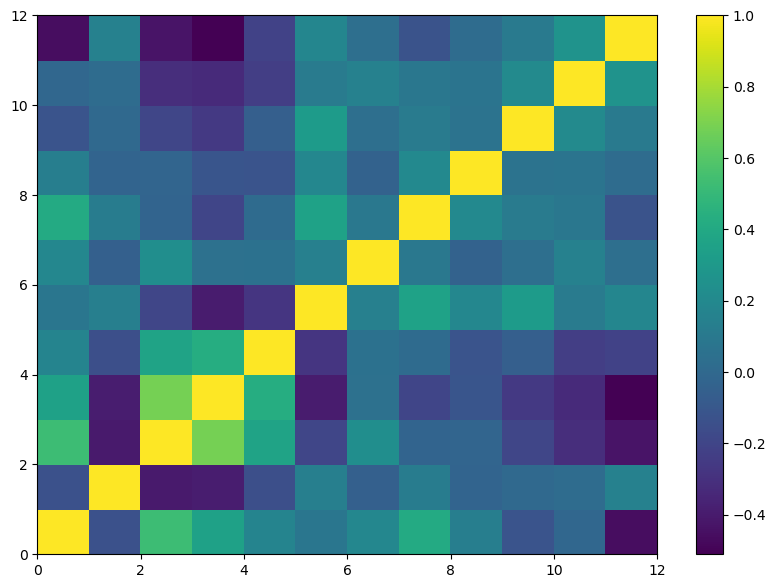

In [53]:
plt.figure(figsize=(10,7))
plt.pcolor(corr_flavors)
plt.colorbar();

Continuing our analysis, the next step involves examining the correlations among different whiskies based on their flavor attributes. This can be accomplished by transposing the dataset.

Doing this helps in uncovering how the flavor profiles of whiskies from various distilleries correlate with each other.

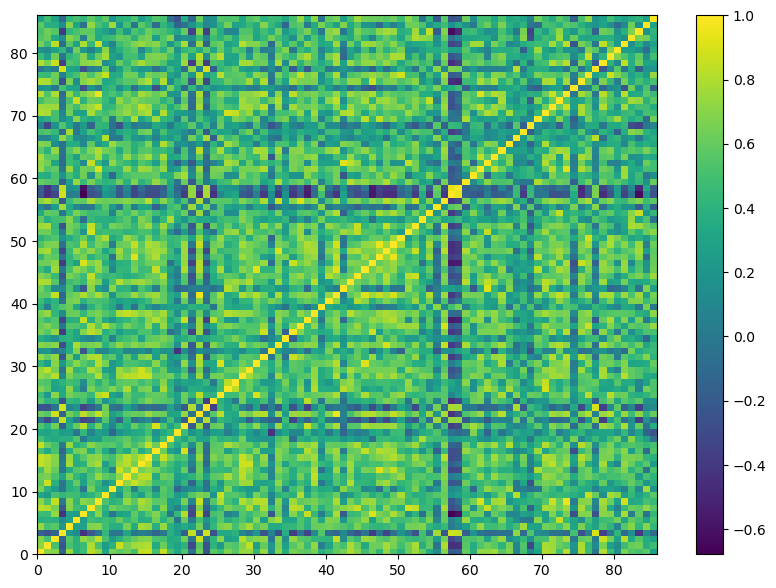

In [54]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize = (10,7))
plt.pcolor(corr_whisky)
plt.colorbar();

## Clustering Whisky by Flavor profile
---

Employing the `spectral co-clustering` technique available in the `scikit-learn` machine learning module, the aim is to discover an approximate solution to the given problem. 

In [55]:
from sklearn.cluster import SpectralCoclustering as SpectralCC

The provided adjacency matrix showcases a relationship where rows correspond to variable 1 and columns correspond to variable 2. Each element within the matrix represents the frequency with which variable 1 is associated with variable 2.

By manipulating this matrix and considering eigenvalues and eigenvectors, an approximate solution to the clustering problem can be found.

The term `spectral` is tied to the use of eigenvalues and eigenvectors. This co-clustering technique addresses the clustering of both rows and columns simultaneously, regardless of their individual meanings.

Employing this method helps in identifying the clusters of whiskies within the correlation matrix of flavor attributes. This approach essentially restructures the order of rows and columns in the correlation matrix, enabling clear identification of blocks representing groups of whiskies.

Given that the dataset encompasses whiskies from six distinct regions, the clustering algorithm is applied to detect six distinct blocks within the matrix.

In [56]:
model = SpectralCC(n_clusters = 6, random_state = 0)
model.fit(corr_whisky)

SpectralCoclustering(n_clusters=6, random_state=0)

After constructing the model object, the model is trained using the data extracted from the `corr_whisky` correlation matrix.

The resulting output is an array that possesses dimensions equal to the number of row clusters, which is 6 in this context, multiplied by the number of rows in the data matrix.

This amounts to 86 enries, representing individual whiskies. Each entry within this array is marked either as `True` or `False`.

In [57]:
model.rows_.shape

(6, 86)

By summing the columns of this array, the totla number of observatoins associated with each cluster can be determined.

In [58]:
np.sum(model.rows_,axis=1)

array([19,  5, 24, 18, 14,  6])

The resulting output provides information about the distribution of whiskies across various clusters. Observing the row labels with the array reveals that they are represented by numbers ranging from 0 to 5, corresponding to the six specified clusters.

In [59]:
model.row_labels_

array([2, 2, 4, 5, 2, 0, 3, 2, 4, 3, 2, 0, 2, 0, 4, 4, 3, 2, 0, 1, 3, 5,
       3, 5, 3, 3, 2, 2, 3, 2, 3, 4, 0, 0, 0, 4, 2, 3, 0, 1, 0, 3, 2, 2,
       2, 3, 4, 0, 0, 3, 3, 2, 2, 2, 0, 1, 2, 5, 5, 0, 3, 4, 2, 4, 3, 2,
       1, 2, 1, 0, 2, 4, 0, 4, 2, 4, 3, 5, 4, 3, 0, 4, 0, 0, 2, 0],
      dtype=int32)

## Comparing Correlation Matrices
---

The process to visualize the cluster involves three tasks:

- Extracting the group labels from the model and add them as a new column to the whisky table

- Rearrange the rows of the table in ascending order based on the group labels

- Resetting the index of the dataframe to ensure proper alignment of data

In [60]:
# task 1: adding cluster group labels to whisky data
whisky_df['Group'] = pd.Series(model.row_labels_, index = whisky_df.index)

# task 2: sorting the whiskies according to increasing order of group lables
whisky_df = whisky_df.iloc[np.argsort(model.row_labels_)]

# task 3: resetting the index of whisky dataframe
whisky_df = whisky_df.reset_index(drop = True)

In [61]:
whisky_df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
4,48,Glenkinchie,1,2,1,0,0,1,2,0,0,2,2,2,EH34 5ET,344380,666690,Lowlands,0


Given the reshuffling of rows and columns in the whsiky dataframe, it is recommended to recalculate the correlation matrix.

In [62]:
correlation_whisky = pd.DataFrame.corr(whisky_df.iloc[:,2:14].transpose())

In [63]:
corr_whisky_np = np.array(correlation_whisky)

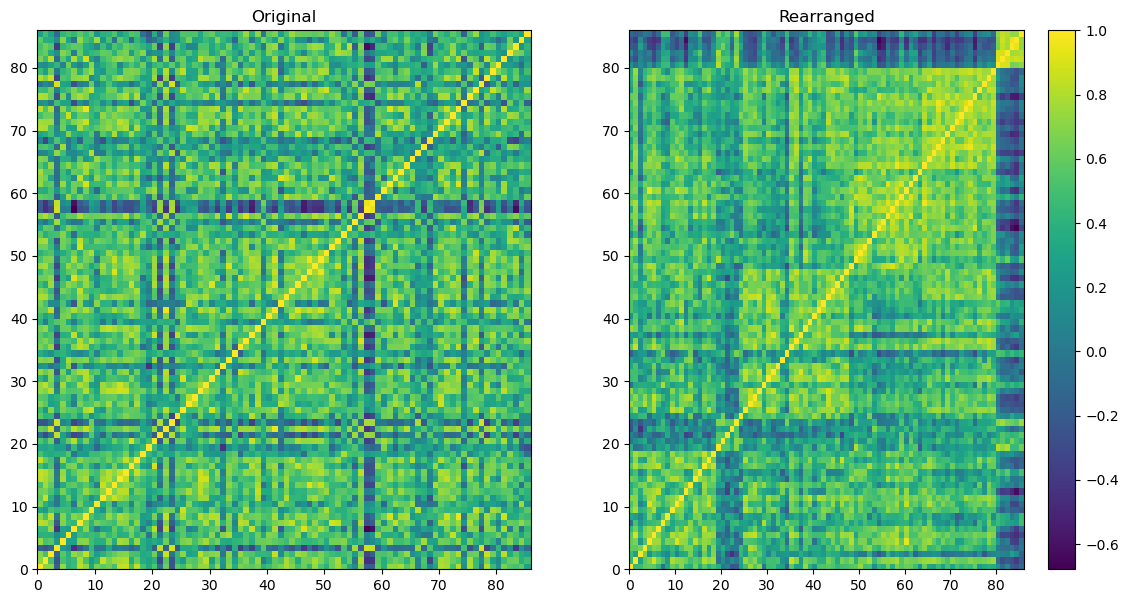

In [64]:
plt.figure(figsize = (14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlation_whisky)
plt.title("Rearranged")
plt.axis("tight");
plt.colorbar();

Here is the plot.

To the left, the initial correlation matrix is showcased, detailing the correlation computed among 86 whiskies based on their flavor profiles.

To the right, a corresponding correlation matrix is shown, but with its rows and columns reorganized.

By applying the spectral co-clustering technique, six distinct clusters of whiskies were identified. Following the diagonal line from the bottom-left corner to the top-right corner on the right matrix, the six clusters of whiskies become visually evident.

It is resonable to anticipate that whiskies within the same cluster share similarities in their flavor profiles.


## Bokeh Plot for Whisky Classification
---

The aim of this case study is to plot the correlations among distillery flavor profiles and generating an interactive geographical map of distilleries. 

The code employs `Bokeh`, a powerful visualization library to create interactive visualizations that enchance the understanding of the intricate relationships between distilleries, their flavor attributes and their geographic locations.

In [65]:
from sklearn.cluster import SpectralCoclustering as CC
import numpy as np, pandas as pd

In [66]:
grouped_whisky = os.path.join(relative_path,"grouped_whisky.csv")

The CSV file containing the whisky data is stored into a dataframe named `whisky`.

The correlation among the flavor attributes are calculated after extracting the columns that correspond to the attributes and transposing them. The correlation values are stored as numpy array in `correlations`.

In [67]:
whisky = pd.read_csv(grouped_whisky, index_col=0)

# cleaning up the whisky dataframe
whisky = whisky.drop(whisky.columns[0], axis = 1)
whisky.index = [x for x in range(len(whisky))]

correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())

# setting integer-based row and column index
correlations.index = [x for x in range(len(correlations))]
correlations.columns = [x for x in range(len(correlations))]

correlations = np.array(correlations)

### Task 1
---

Providing an introductory demonstration of an interactive grid plot using `Bokeh`.

- Writing the code to plot an example Bokeh plot

In [68]:
# First, a tool is imported to enable the display of text when the 
# cursor is positioned over a plot element. Additionally, a
# data structure is imported to store plot specifications for utilizing
# in Bokeh visualizations
  
from bokeh.models import HoverTool, ColumnDataSource



Importing 'product' function from 'itertools' module. The function is used to create a list containing all possible combinations of elements from 'plot_values' list to form a grid-like structure

In [69]:
# Plotting a simple 5x5 grid of squares, alternating between two colors
plot_values = [1,2,3,4,5]
plot_colors = ['#0173b2', '#de8f05']

from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


In [70]:
# The first value is the x coordinate, and the second value is the y coordinate.
# The coordinate values are stored in seperate lists

xs, ys = zip(*grid)
print(xs)
print(ys)

(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)


In [71]:
# Making a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

['#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2', '#de8f05', '#0173b2']


In [72]:
# Lastly, the alpha value for each point is calculated to
# indicate its transparency level, with 0 denoting full transparency

alphas = np.linspace(0, 1, len(grid))

# Bokeh stores each of these values in a special dataframe, called
# ColumnDataSource. The values for coordinates, colors, and
# alpha values are stored in it.

source = ColumnDataSource(
    data = {
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)

The `fig.rect()` function is used to draw a rectangular figure on the plot, with the position and size of each rectangle being determined the by `x` and `y` coordinates from `grid`.

The color of each rectangle is set based on the `colors` list and the transparency from `alphas`.

In [32]:
from bokeh.plotting import figure, output_file, show

# Setting the name of the output file
output_file("Basic_Example.html", title="Basic Example")


fig = figure(tools="hover")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }

# Displaying the plot in the output file
show(fig)

![example_bokeh_plot.png](example_bokeh_plot.png)

### Task 2 
---

Generating the names and colors required for plotting the correlation matrix of whisky flavors.

- Constructing a dictionary named `region_colors` where the keys are the `regions` and the values are the corresponding `cluster_colors`
- Displaying the content of `region_colors` dictionary by printing it

In [73]:
cluster_colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161']
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]

region_colors = {regions[i]: cluster_colors[i] for i in range(len(regions))}

In [74]:
region_colors

{'Speyside': '#0173b2',
 'Highlands': '#de8f05',
 'Lowlands': '#029e73',
 'Islands': '#d55e00',
 'Campbelltown': '#cc78bc',
 'Islay': '#ca9161'}

### Task 3
---

The objective of this task is to create a list called `correlation_colors`, where the values correspond to colors for plotting distillery pairs based on their flavor correlations.

- Establishing `correlation_colors` for each distillery pair. When the correlation is below `0.7`, the color `white` is assigned

- For distillery pairs with correlations surpassing `0.7`, if they share same whisky group, then the associated color from `cluster_colors` is used. Otherwise, `lightgray` is assigned to `correlation_colors` for the particular distillery pair.

In [75]:
distilleries = list(whisky.Distillery)
correlation_colors = []

for i in range(len(distilleries)):
    
    for j in range(len(distilleries)):

        # for correlation less than 0.7
        if correlations[i][j] < 0.7:
            
            # 'white' is the color appended
            correlation_colors.append('white')

        else:

            # if groups are identical                                         
            if correlations[i][j] == 1.0:                  
                # the mutual group color is appended
                correlation_colors.append(cluster_colors[whisky.Group[i]])

            else:
                # otherwise, 'lightgray' is appended                                      
                correlation_colors.append('lightgray')

In [76]:
len(correlation_colors)

7396

### Task 4
---

- Assigning the list `correlation_colors` which contains string color values for each pair of distilleries, to the `color` attribute within `ColumnDataSource`

- Defining `correlations` attribute within the `source` using the array containing the correlation of whisky flavors. To convert `correlations` from a numpy array to a list, the `flatten` method is employed

In [37]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors,
        "correlations": list(correlations.flatten())
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", x_range=list(reversed(distilleries)), y_range=distilleries,
    tools="hover,box_zoom,reset")
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "4pt"
fig.xaxis.major_label_orientation = np.pi / 3
fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}

show(fig)

![whisky_correlation_plot.png](whisky_correlation_plot.png)

### Task 6
---

The objective of this task is to define a function named `location_plot` that takes two inputs: a string `title` and a list of colors corresponding to each distillery. The function produces a Bokeh plot illustrating the geographic locations of each distillery based on their latitude and longitude.

- The `region` column in the dataframe `whisky` contains information about the regional group membership of each distillery. Create a list composed of the values from `region_colors` for each distillery and assigning this list to the variable `region_cols`

- Implementing the `location_plot` function to generate a plot for each distillery

In [77]:
def location_plot(title,colors):
    """ 
    The function creates an interactive scatter plot of whisky
    distillery locations using Bokeh.

    Inputs:
        title (str): Title of the plot and the name of the output HTML file
        colors (list): List of color values corresponding to each distillery

    Return:
        None

        The function disaplys an interactive scatter plot and saves
        an HTML file
    """
    
    # Set up the output HTML file
    output_file(title+".html")

    # Creating ColumnDataSource object with 
    # location data and attributes
    location_source = ColumnDataSource(
        data = {
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Region,
            "distilleries": whisky.Distillery
        }
    )

    # Create a figure with hover and save tools
    fig = figure(title = title,
        x_axis_location = "above", tools="hover, save")
    fig.plot_width  = 400
    fig.plot_height = 500

    # Create circles representing distillery locations
    fig.circle("x", "y", size=9, source=location_source, color='colors', line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3

    # Setting up tooltips for hover tool
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }

    # Displaying the plot
    show(fig)

In [78]:
set(whisky["Region"])

{'Campbelltown', 'Highlands', 'Islands', 'Islay', 'Lowlands', 'Speyside'}

In [40]:
#color_array = np.repeat(list(region_colors.values()),len(whisky['Distillery']))
region_cols = [region_colors[region] for region in whisky["Region"]]
location_plot("Whisky Locations and Regions", region_cols)

![distillery_locations.png](distillery_locations.png)

In this graph, we observe the distribution of whiskies across six distinct regions. Each region showcases a unique blend of flavors and characteristics that define its whiskies. Notably, the distribution of whiskies within the same region tends to follow a consistent pattern, highlighting the influence of regional factors on flavor profiles.

The graph offers an intriguing perspective on how different whisky group types are distributed across various regions. While regions play a significant role in shaping whisky flavors, it's fascinating to note that the distribution of group types can vary significantly across these regions. This variation suggests a rich diversity in flavor profiles that transcends geographical boundaries.

### Task 7
---

- Creating the list `classification_cols` by associating each distillery's `Group` membership with the respective color from the `cluster_colors` list

- Employing the `location_plot` functino to generate two interactive plots of distilleries: one using `region_cols` for color coding and the other using `classification_cols`

In [120]:
region_cols = [region_colors[region] for region in whisky['Region']]
classification_cols = [cluster_colors[ind] for ind in whisky['Group']]

location_plot("Whisky Locations and Groups", classification_cols)

![distillery_groups.png](distillery_groups.png)

The interplay between regions and group types becomes even more apparent in this graph. As we examine the distribution of whiskies within the same regions across different group types, a consistent regional pattern emerges. At the same time, the varying proportions of group types across regions highlight the nuanced interactions between regional influences and whisky characteristics.

The graph showcases the intricate relation between regions and group types, revealing the complexity and diversity of whisky production. While regions provide a foundation for flavor development, the distribution of group types underscores the artistry of crafting whiskies with distinct characteristics. This visual representation unveils a world of flavors that reflects the ingenuity of distilleries in different regions producing similar flavors.

---